<!--BOOK_INFORMATION-->
<img align="left" style="padding-right:10px;" src="figures/PDSH-cover-small.png">
*This notebook contains an excerpt from the book Machine Learning for OpenCV by Michael Beyeler; the content is available [on GitHub](https://github.com/mbeyeler/opencv-machine-learning).*

*The text is released under the [CC-BY-NC-ND license](https://creativecommons.org/licenses/by-nc-nd/3.0/us/legalcode), and code is released under the [MIT license](https://opensource.org/licenses/MIT). If you find this content useful, please consider supporting the work by [buying the book](https://github.com/mbeyeler/opencv-machine-learning)!*

<!--NAVIGATION-->
< [Logistic Regression](03.02-Logistic-Regression.ipynb) | [Contents](../README.md) | [## Training the model](03.04-Ridge-Regression.ipynb) >

# Using regression models to predict continuous outcomes

Rather than predicting discrete class labels, regression is all about predicting continuous outcomes.

## Linear Regression

The easiest regression model is called linear regression. The idea is actually very similar to the input-output function we just discussed when talking about logistic regression. The idea is to use a linear function that links an input feature value `f1` to the predicted output value `y`, such as the housing price mentioned above: `y = w0 + w1*f1`. Our goal is to learn the weights w0 and `w1`, such that we can describe the target variable (such as the housing price) as closely as possible. If the data has more than one feature, we simply extend the sum as we have done above, such that every feature gets a weight.

### Loading the dataset

In [1]:
import numpy as np
import cv2

from sklearn import datasets
from sklearn import metrics
from sklearn import model_selection
from sklearn import linear_model

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams.update({'font.size': 16})

The Boston dataset is included in Scikit-Learn's example datasets:

In [2]:
boston = datasets.load_boston()

Inspect the `boston` object:
- `DESCR`: Get a description of the data
- `data`: The actual data, <`num_samples` x `num_features`>
- `feature_names`: The names of the features
- `target`: The class labels, <`num_samples` x 1>
- `target_names`: The names of the class labels

In [3]:
dir(boston)

['DESCR', 'data', 'feature_names', 'target']

In [4]:
boston.data.shape

(506, 13)

In [5]:
boston.target.shape

(506,)

### Training the model

Set up a linear regression model using Scikit-Learn:

In [6]:
linreg = linear_model.LinearRegression()

Split the data into training and test sets:

In [7]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(boston.data, boston.target,
                                                                    test_size=0.1, random_state=42)

In [8]:
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Get the training error and score:

In [9]:
metrics.mean_squared_error(y_train, linreg.predict(X_train))

22.739484154236614

In [10]:
linreg.score(X_train, y_train)

0.73749340919011974

### Testing the model

Get the test error:

In [11]:
y_pred = linreg.predict(X_test)

In [12]:
metrics.mean_squared_error(y_test, y_pred)

15.010997321630049

Plot everything:

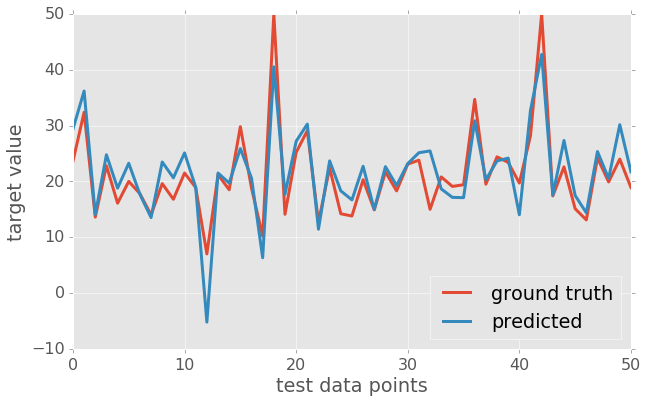

In [13]:
plt.figure(figsize=(10, 6))
plt.plot(y_test, linewidth=3, label='ground truth')
plt.plot(y_pred, linewidth=3, label='predicted')
plt.legend(loc='best')
plt.xlabel('test data points')
plt.ylabel('target value')

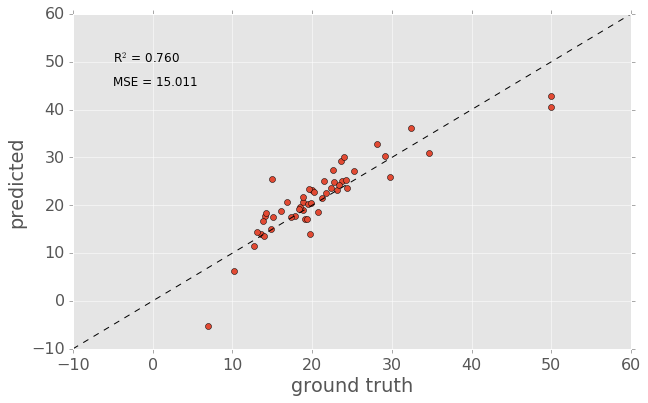

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(y_test, y_pred, 'o')
plt.plot([-10, 60], [-10, 60], 'k--')
plt.axis([-10, 60, -10, 60])
plt.xlabel('ground truth')
plt.ylabel('predicted')

scorestr = r'R$^2$ = %.3f' % linreg.score(X_test, y_test)
errstr = 'MSE = %.3f' % metrics.mean_squared_error(y_test, y_pred)
plt.text(-5, 50, scorestr, fontsize=12)
plt.text(-5, 45, errstr, fontsize=12)

<!--NAVIGATION-->
< [Logistic Regression](03.02-Logistic-Regression.ipynb) | [Contents](../README.md) | [## Training the model](03.04-Ridge-Regression.ipynb) >